![Image](./img/dataset-diagram-logo.png)


**objectif** : pandas like but for **ndim**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

<xarray.DataArray ()>
array(2)

In [3]:
data = xr.DataArray(np.random.randint(6, size=(2, 3)), coords={'x': ['a', 'b']}, dims=('x', 'y'))
data

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

In [4]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

## Attribute of DataArray

In [5]:
print('values : ', data.values)
print('dims : ', data.dims)
print('coords : ', data.coords)
print('attrs metadata', data.attrs)

values :  [[4 5 0]
 [2 5 0]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 'a' 'b'
attrs metadata {}


## Indexing

### numpy like

In [6]:
data[:2, :]

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### pandas like with loc[]

In [7]:
data.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with isel()

In [8]:
data.isel(x=[0, 1])

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with sel()

In [9]:
data.sel(x=['a', 'b'])

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Attributes (metadata) usefull for protting

In [10]:
data.attrs['long_name'] = 'random unseless stuff'
data.attrs['units'] = 'mV'
data

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

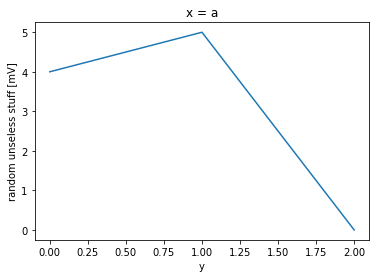

In [11]:
data.sel(x='a').plot()

## Computation / aggregation

In [12]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
data.mean(dim='y')

<xarray.DataArray (x: 2)>
array([3.        , 2.33333333])
Coordinates:
  * x        (x) <U1 'a' 'b'

## GroupBy

In [13]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [14]:
labels = xr.DataArray(['E', 'F', 'E'], coords = [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [15]:
data1 = data.groupby(labels).mean('y')
data1

<xarray.DataArray (x: 2, labels: 2)>
array([[2., 5.],
       [1., 5.]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'

In [16]:
data2 = data.groupby(labels).apply(lambda x: x - x.min())
data2

<xarray.DataArray (x: 2, y: 3)>
array([[4, 0, 0],
       [2, 0, 0]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Pandas

In [17]:
series = data.to_series()
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[4, 5, 0],
       [2, 5, 0]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Dataset = DataArray in the same place

In [18]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

data1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

data2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': data1,
                 'time_freq' : data2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 0.2881 0.778 -1.027 ... -0.5993 0.9215 -1.196
    time_freq   (times, freqs) float64 0.5116 1.788 -0.8284 ... -1.201 0.2333
    one_scalar  float64 3.142

In [19]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)>
array([ 2.88122640e-01,  7.78035655e-01, -1.02702545e+00, -3.96517721e-01,
       -1.57828957e+00, -1.01924022e+00,  9.65876628e-01, -9.97228302e-01,
       -9.53807331e-01, -2.91665526e-01,  1.57784425e+00,  1.04255224e-01,
        5.35574969e-01, -1.02710206e+00,  1.24035342e+00, -9.61513328e-01,
       -1.16248761e+00, -6.35443605e-01, -5.40294012e-01, -1.48309286e+00,
       -3.24464826e-01,  7.59532103e-01, -6.22416443e-01, -4.85283601e-01,
        4.60100895e-01, -4.71710244e-02, -4.66697491e-01,  3.99541012e-01,
       -1.58688438e+00, -1.23831214e+00,  2.16770133e+00,  1.38083695e+00,
       -9.09677953e-01, -1.61164802e+00,  1.18177440e+00,  8.69325801e-02,
        9.10617299e-01,  1.55634216e+00, -1.38491031e+00,  1.64608697e-01,
        5.53777202e-02,  7.54406878e-01, -1.34125622e+00,  6.80960488e-01,
       -5.89543594e-01,  5.64135530e-02, -3.12961228e-01, -5.94164914e-02,
        2.51802556e+00, -3.02261256e-01,  1.50327815e+00,  1.40821292e-01,
        3.11417515e-02,  1.73784976e+00,  9.66917384e-01, -1.20747167e+00,
        9.66790252e-01,  5.95136773e-01, -6.77826931e-01,  1.79334933e+00,
       -1.44689986e+00, -1.58709630e-01,  1.19574418e+00,  2.17366418e+00,
       -9.06871002e-01,  5.84334064e-01, -1.37895637e+00, -6.89445493e-01,
       -7.38343889e-01,  1.55700061e+00, -2.02171382e+00, -5.16232217e-02,
       -1.62119491e+00, -3.74601346e-01, -1.29544103e-01, -1.75697120e+00,
       -2.18698325e-01,  7.03885649e-01,  7.29855857e-01,  4.65600477e-01,
...
       -4.31124945e-01,  1.51900947e+00,  5.74785564e-01,  6.46375528e-01,
        2.03205583e+00,  5.09291342e-01,  1.48763716e+00, -9.94980667e-01,
       -3.31986363e-01, -2.35981322e+00, -3.38691440e-01,  1.92588149e-01,
       -1.49070764e+00,  2.22427354e+00, -7.42406320e-01, -1.06287621e+00,
        9.63970489e-01, -5.12095921e-01,  9.02171691e-01,  4.67941070e-01,
        6.70631931e-02, -5.30667411e-01, -1.00791085e+00,  4.92271883e-01,
       -1.41213081e+00, -1.07174181e-01, -5.15614291e-01,  1.83733714e+00,
       -5.35647313e-02, -3.54173173e-01, -1.51346180e-01, -6.13903621e-02,
        3.93577548e-02, -9.03205144e-01,  1.07760285e-02,  2.63378087e-01,
       -1.34861200e+00,  1.01485282e+00,  1.09485111e+00,  8.52829947e-02,
        6.09529609e-01, -1.26169457e+00, -1.19964262e+00,  4.40836258e-01,
       -1.80779397e-01, -2.44968028e-01, -1.23860233e+00, -1.75218224e+00,
       -9.89729660e-01, -6.06367610e-02,  2.52234043e-01, -4.40608567e-01,
        1.45139623e+00,  1.29684580e-01, -7.56840752e-01,  3.92180653e-01,
       -6.37598841e-01, -1.34938898e-03, -3.02553374e-01, -4.33184058e-01,
        1.22547765e-01, -4.76165928e-01, -3.29459184e-01, -6.33522011e-01,
        1.28371688e+00, -6.86904511e-01,  1.15069199e+00, -3.75256411e-01,
       -4.52505184e-01, -2.12278567e-01, -2.15673307e-01,  8.59366425e-01,
        1.03828277e+00,  1.06200960e+00,  4.12328592e-01, -6.19845837e-01,
       -4.55659739e-01, -5.99296368e-01,  9.21490620e-01, -1.19551894e+00])
Coordinates:
  * times    (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [20]:
ds.isel(times=slice(0,100))

<xarray.Dataset>
Dimensions:     (freqs: 20, times: 100)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 0.2881 0.778 -1.027 ... -2.579 -1.609 -0.5314
    time_freq   (times, freqs) float64 0.5116 1.788 -0.8284 ... 1.394 0.5391
    one_scalar  float64 3.142

## NetCDF

In [21]:
ds.to_netcdf('example.nc')

In [22]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...
    one_scalar  float64 ...